In [2]:
!pip install transformers torch matplotlib seaborn nltk


In [3]:
import torch 
from transformers import BertTokenizer,BertForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


In [25]:
text="Artificial Intelligence is  transforming the world!"
tokens=tokenizer.tokenize(text)
token_ids=tokenizer.convert_tokens_to_ids(tokens)
print("Tokens:",tokens)
print("Token IDs:",token_ids)

Tokens: ['artificial', 'intelligence', 'is', 'transforming', 'the', 'world', '!']
Token IDs: [7976, 4454, 2003, 17903, 1996, 2088, 999]


In [26]:
inputs=tokenizer.encode_plus(text,add_special_tokens=True,return_tensors="pt",)
print("Input Ids:",inputs["input_ids"])
print("Attention Mask:",inputs["attention_mask"])


Input Ids: tensor([[  101,  7976,  4454,  2003, 17903,  1996,  2088,   999,   102]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [27]:
with torch.no_grad():
    outputs=model(**inputs)
logits=outputs.logits
print("Logits",logits)


Logits tensor([[-3.6672,  3.8849]])


In [28]:
import torch.nn.functional as F
probs=F.softmax(logits,dim=1)
pred_label=torch.argmax(probs,dim=1).item()
print("Probabilities:",probs)
print("Predicted_label:",pred_label)

Probabilities: tensor([[5.2474e-04, 9.9948e-01]])
Predicted_label: 1


In [31]:
texts=["AI is powerful!","I feel sad today.","The weather is nice"]
encoded_inputs=tokenizer(texts,padding=True,truncation=True,return_tensors="pt")
with torch.no_grad():
    outputs=model(**encoded_inputs)
probs = F.softmax(outputs.logits, dim=1)
predictions = torch.argmax(probs, dim=1)

for i,text in enumerate(texts):
    print(f"Text:{text}")
    print(f"Prediction:{predictions[i].item()}")
    print(f"Probabilities:{probs[i].tolist()}")
    print()

    

Text:AI is powerful!
Prediction:1
Probabilities:[0.00017733394633978605, 0.9998226761817932]

Text:I feel sad today.
Prediction:0
Probabilities:[0.998754620552063, 0.0012453668750822544]

Text:The weather is nice
Prediction:1
Probabilities:[0.00015963953046593815, 0.9998403787612915]



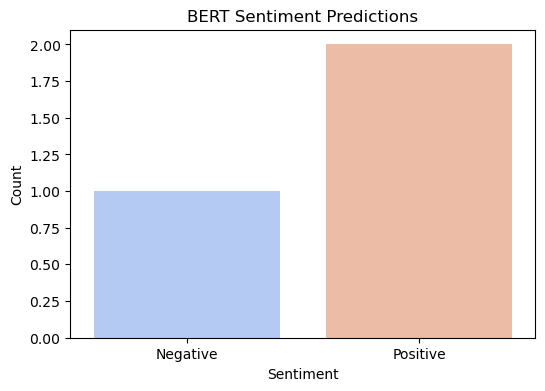

In [32]:
labels=["Negative","Positive"]
pred_counts=[sum(predictions==i).item() for i in range(2)]
plt.figure(figsize=(6,4))
sns.barplot(x=labels,y=pred_counts,palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("BERT Sentiment Predictions")
plt.show()